# **Lab-5** 

#### **Samiksha Rajpal - 8908982**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.metrics import make_scorer, mean_absolute_error,mean_absolute_percentage_error

import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt



##### 1. Utilize the diabetes dataset from lab 4. Perform cross-validation on nine polynomial models, ranging from degree 0 to 8. (2 points)


#### Loading Dataset followed by Splitting Testing & training set

In [2]:
X_diabetes, y_diabetes = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.30, random_state=42)

##### 2. Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Include the R-Squared, Mean Absolute Error (MAE) and MAPE metrics for each model. Calculate the mean value and standard deviation of these metrics from the cross-validation. Include both values. (2 points)

### a. Creating empty lists to store results
### b. Cross Validation - Mape, MAE, R2

In [27]:
deg = []
ScoresR2 = []
ScoresMAE = []
ScoresMAPE = []

for degree in range(0,9):
    featuresPoly = PolynomialFeatures(degree=degree)
    polyX = featuresPoly.fit_transform(X_train)
    deg.append(degree)
    
    model = LinearRegression()
    
    r2 = cross_val_score(model, polyX, y_train, cv=10, scoring='r2')
    ScoresR2.append(np.mean(r2))
    
    mape = cross_val_score(model, polyX, y_train, cv=10, scoring=make_scorer(mean_absolute_percentage_error))
    ScoresMAPE.append(np.mean(mape))

    mae = cross_val_score(model, polyX, y_train, cv=10, scoring=make_scorer(mean_absolute_error))
    ScoresMAE.append(np.mean(mae))


#### Resulting Table for MAE, MAPE, R2 Scores

In [28]:
# result = pd.DataFrame(columns=['Degree','MAE', 'R2', 'MAPE'])

# for degree, r2, mae, mape in zip(degrees, ScoresR2, ScoresMAE,ScoresMAPE):
#     data = {
#         'Degree': degree,
#         'MAE': mae,
#         'R2': r2,
#         'MAPE' : mape
#     }
#     result = result.append(data, ignore_index=True)

table = []
table.append(['Degree', 'R-2', 'MAE','MAPE'])
for degree, r2, mae, mape in zip(deg, ScoresR2, ScoresMAE,ScoresMAPE):
    table.append([degree, r2, mae, mape])

r2Mean = np.mean(ScoresR2)
mapeMean = np.mean(ScoresMAPE)
maeMean = np.mean(ScoresMAE)

mapeSdeviation = np.std(ScoresMAPE)
r2Sdeviation = np.std(ScoresR2)
maeSdeviation = np.std(ScoresMAE)

table.append(['mean', r2Mean, maeMean,mapeMean])
table.append(['sd', r2Sdeviation, maeSdeviation,mapeSdeviation])

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------+---------------+-----------+-----------+
| Degree   |           R-2 |       MAE |      MAPE |
+==========+===============+===========+===========+
| 0        |    -0.0751294 |   67.0768 |  0.64038  |
+----------+---------------+-----------+-----------+
| 1        |     0.399254  |   45.8281 |  0.410541 |
+----------+---------------+-----------+-----------+
| 2        |     0.162264  |   53.0897 |  0.461267 |
+----------+---------------+-----------+-----------+
| 3        | -6055.02      | 2021.82   | 14.7025   |
+----------+---------------+-----------+-----------+
| 4        |  -223.988     |  526.155  |  4.02874  |
+----------+---------------+-----------+-----------+
| 5        |  -338.899     |  520.616  |  4.24638  |
+----------+---------------+-----------+-----------+
| 6        |  -951.088     |  652.377  |  5.53226  |
+----------+---------------+-----------+-----------+
| 7        | -2824.92      |  874.007  |  7.62098  |
+----------+---------------+-----------+------

##### 3. Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared, MAE and MAPE metrics. Provide an explanation for choosing this specific model. (1 points)

Text(0.5, 1.0, ' Polynomial Degree vs Mae Scores')

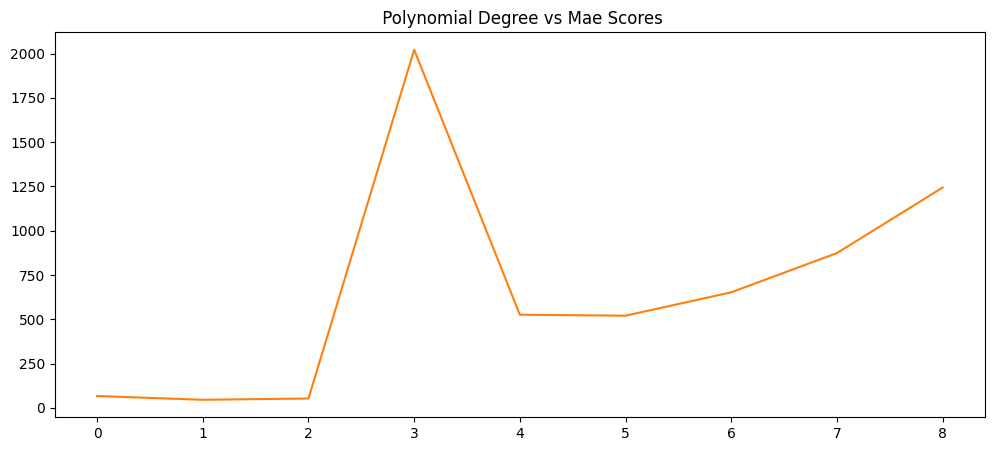

In [29]:
deg = list(range(0,9)) 

plt.figure(figsize=(12, 5))
plt.plot(131)
sb.lineplot(x=deg, y=ScoresMAE)
plt.title(" Polynomial Degree vs Mae Scores")

Text(0.5, 1.0, 'Polynomial Degree vs Mape Scores')

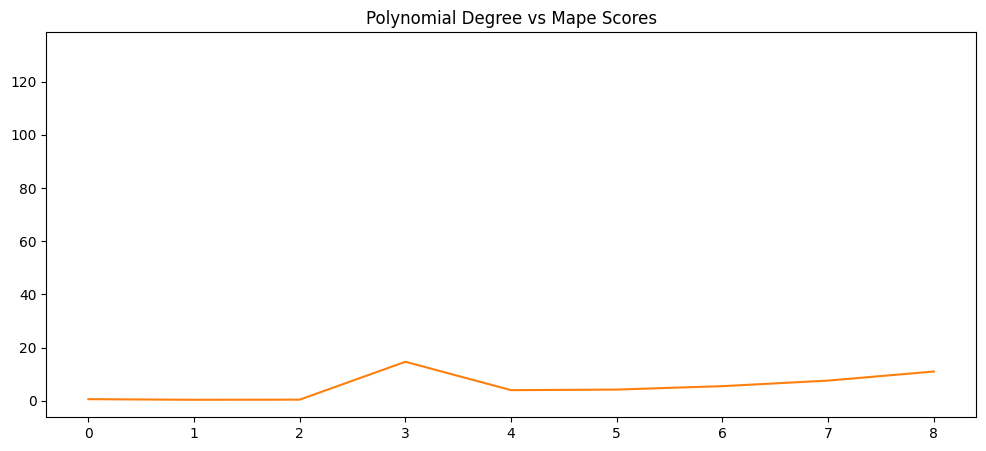

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(132)
sb.lineplot(x=deg, y=ScoresMAPE)
plt.title("Polynomial Degree vs Mape Scores")

1

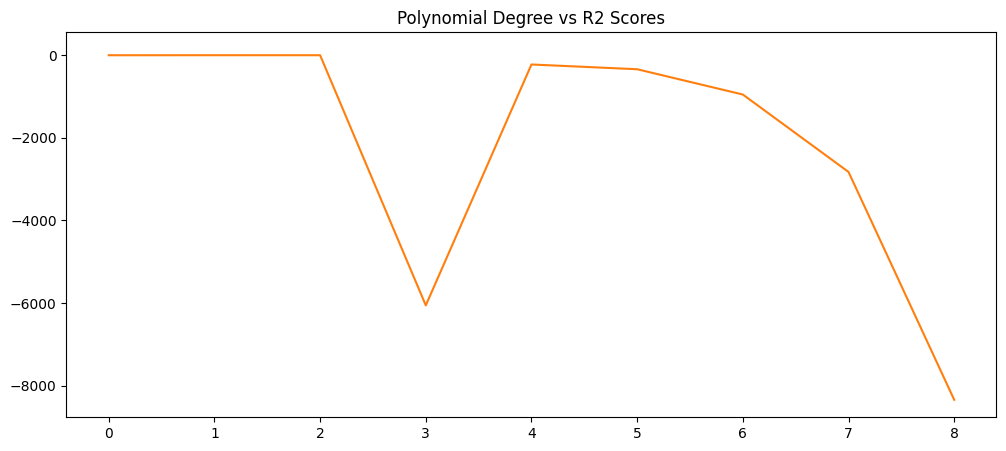

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(132)
sb.lineplot(x=deg, y=ScoresR2)
plt.title("Polynomial Degree vs R2 Scores")
deg[np.argmin(ScoresMAE)]

##### 4. Additional analysis and interpretation of the models' performances. You may explore further insights beyond the required metrics. The analysis should provide at least one relevant insight about the choice of the best model, or about characteristics of the chosen one (for example - an analysis of in which instances does it fail) (1 point).

## Analyzing the data presented in the graph and table, it's evident that the R2 Score is only positive for the 1st degree, measuring at 0.449351 or approximately 0.45. On the other hand, the lowest score is observed at degree 3. This indicates that making predictions based on the average disease progression is more accurate than relying on the model in this context.